<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/K_means_3_4_5_6_clusters_specifics_columnd_silhoette_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas torch openpyxl

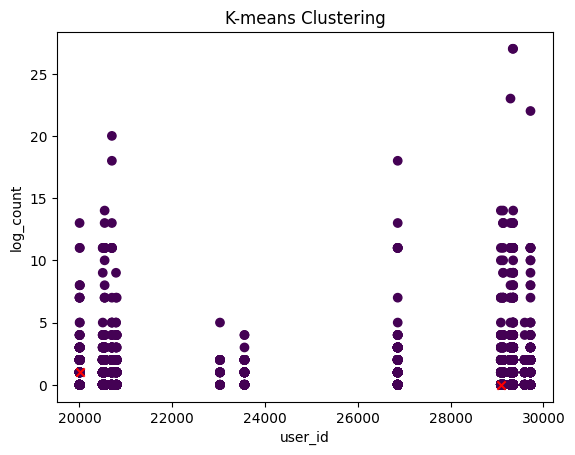

In [ ]:
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt

# Step 1: Read the Excel file
def read_excel(file_path):
    df = pd.read_excel(file_path)
    return df

# Step 2: Select specific columns (second and fourth columns)
def select_columns(df):
    df_selected = df.iloc[:, [1, 3]]
    return df_selected

# Step 3: Convert to PyTorch tensor
def df_to_tensor(df):
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    return data_tensor

# Step 4: Perform K-means clustering
def kmeans_clustering(data_tensor, num_clusters, num_iterations=100):
    # Randomly initialize cluster centers
    num_samples, num_features = data_tensor.size()
    centroids = data_tensor[torch.randperm(num_samples)[:num_clusters]]

    for i in range(num_iterations):
        # Compute distances from samples to centroids
        distances = torch.cdist(data_tensor, centroids)

        # Assign each sample to the closest centroid
        cluster_assignments = torch.argmin(distances, dim=1)

        # Update centroids
        new_centroids = torch.zeros_like(centroids)
        for k in range(num_clusters):
            cluster_points = data_tensor[cluster_assignments == k]
            if cluster_points.size(0) > 0:
                new_centroids[k] = cluster_points.mean(dim=0)
            else:
                new_centroids[k] = data_tensor[torch.randint(0, num_samples, (1,))]

        if torch.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, cluster_assignments

# Step 5: Plot results
def plot_clusters(data_tensor, cluster_assignments, centroids):
    plt.scatter(data_tensor[:, 0], data_tensor[:, 1], c=cluster_assignments, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('user_id')
    plt.ylabel('log_count')
    plt.title('K-means Clustering')
    plt.show()

# Main function to perform the steps
def main(file_path, num_clusters):
    df = read_excel(file_path)
    df_selected = select_columns(df)
    data_tensor = df_to_tensor(df_selected)
    centroids, cluster_assignments = kmeans_clustering(data_tensor, num_clusters)
    plot_clusters(data_tensor, cluster_assignments, centroids)

# Example usage
file_path = '/content/logs_CAD_2024_1.xlsx'  #  file path
num_clusters = 3  #  the number of clusters
main(file_path, num_clusters)


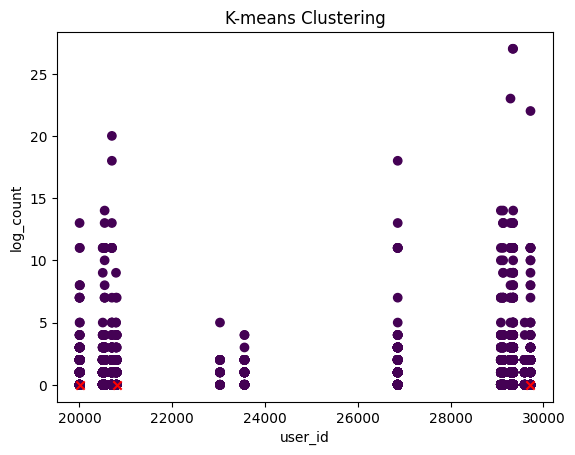

In [ ]:
def read_excel(file_path):
    df = pd.read_excel(file_path)
    return df

# Step 2: Select specific columns (second and fourth columns)
def select_columns(df):
    df_selected = df.iloc[:, [1, 3]]
    return df_selected

# Step 3: Convert to PyTorch tensor
def df_to_tensor(df):
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    return data_tensor

# Step 4: Perform K-means clustering
def kmeans_clustering(data_tensor, num_clusters, num_iterations=100):
    # Randomly initialize cluster centers
    num_samples, num_features = data_tensor.size()
    centroids = data_tensor[torch.randperm(num_samples)[:num_clusters]]

    for i in range(num_iterations):
        # Compute distances from samples to centroids
        distances = torch.cdist(data_tensor, centroids)

        # Assign each sample to the closest centroid
        cluster_assignments = torch.argmin(distances, dim=1)

        # Update centroids
        new_centroids = torch.zeros_like(centroids)
        for k in range(num_clusters):
            cluster_points = data_tensor[cluster_assignments == k]
            if cluster_points.size(0) > 0:
                new_centroids[k] = cluster_points.mean(dim=0)
            else:
                new_centroids[k] = data_tensor[torch.randint(0, num_samples, (1,))]

        if torch.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, cluster_assignments

# Step 5: Plot results
def plot_clusters(data_tensor, cluster_assignments, centroids):
    plt.scatter(data_tensor[:, 0], data_tensor[:, 1], c=cluster_assignments, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('user_id')
    plt.ylabel('log_count')
    plt.title('K-means Clustering')
    plt.show()

# Main function to perform the steps
def main(file_path, num_clusters):
    df = read_excel(file_path)
    df_selected = select_columns(df)
    data_tensor = df_to_tensor(df_selected)
    centroids, cluster_assignments = kmeans_clustering(data_tensor, num_clusters)
    plot_clusters(data_tensor, cluster_assignments, centroids)

# Example usage
file_path = '/content/logs_CAD_2024_1.xlsx'  #  file path
num_clusters = 4  #  the number of clusters
main(file_path, num_clusters)

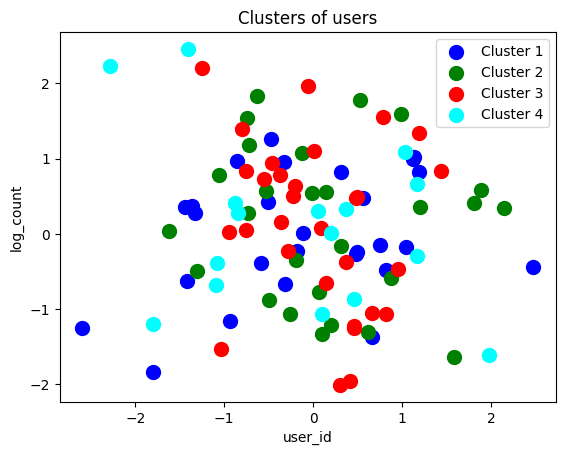

In [ ]:
#visulaizing the clusters
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias plt

#visulaizing the clusters
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias plt

# Assuming 'x' holds your data and 'y_pred' holds cluster assignments
# Replace these with your actual data and cluster assignments
x = torch.randn(100, 2)  # Replace with your actual data
y_pred = torch.randint(0, 4, (100,)) # Replace with your actual cluster assignments

plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of users')
plt.xlabel('user_id')
plt.ylabel('log_count')
plt.legend()
plt.show()

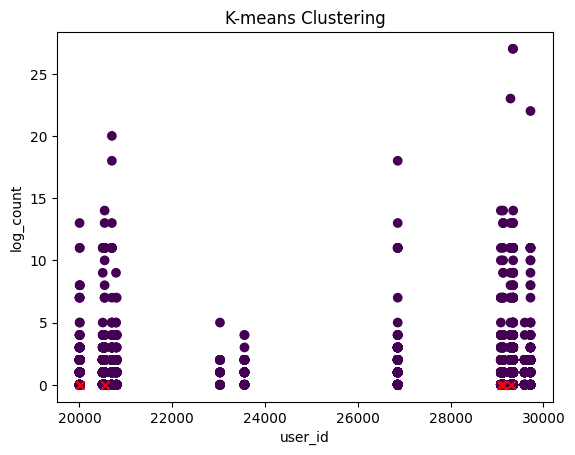

In [ ]:
def read_excel(file_path):
    df = pd.read_excel(file_path)
    return df

# Step 2: Select specific columns (second and fourth columns)
def select_columns(df):
    df_selected = df.iloc[:, [1, 3]]
    return df_selected

# Step 3: Convert to PyTorch tensor
def df_to_tensor(df):
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    return data_tensor

# Step 4: Perform K-means clustering
def kmeans_clustering(data_tensor, num_clusters, num_iterations=100):
    # Randomly initialize cluster centers
    num_samples, num_features = data_tensor.size()
    centroids = data_tensor[torch.randperm(num_samples)[:num_clusters]]

    for i in range(num_iterations):
        # Compute distances from samples to centroids
        distances = torch.cdist(data_tensor, centroids)

        # Assign each sample to the closest centroid
        cluster_assignments = torch.argmin(distances, dim=1)

        # Update centroids
        new_centroids = torch.zeros_like(centroids)
        for k in range(num_clusters):
            cluster_points = data_tensor[cluster_assignments == k]
            if cluster_points.size(0) > 0:
                new_centroids[k] = cluster_points.mean(dim=0)
            else:
                new_centroids[k] = data_tensor[torch.randint(0, num_samples, (1,))]

        if torch.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, cluster_assignments

# Step 5: Plot results
def plot_clusters(data_tensor, cluster_assignments, centroids):
    plt.scatter(data_tensor[:, 0], data_tensor[:, 1], c=cluster_assignments, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('user_id')
    plt.ylabel('log_count')
    plt.title('K-means Clustering')
    plt.show()

# Main function to perform the steps
def main(file_path, num_clusters):
    df = read_excel(file_path)
    df_selected = select_columns(df)
    data_tensor = df_to_tensor(df_selected)
    centroids, cluster_assignments = kmeans_clustering(data_tensor, num_clusters)
    plot_clusters(data_tensor, cluster_assignments, centroids)

# Example usage
file_path = '/content/logs_CAD_2024_1.xlsx'  #  file path
num_clusters = 6  #  the number of clusters
main(file_path, num_clusters)

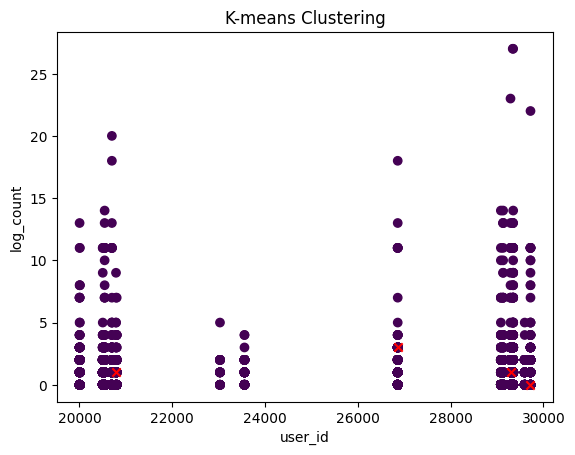

In [ ]:
def read_excel(file_path):
    df = pd.read_excel(file_path)
    return df

# Step 2: Select specific columns (second and fourth columns)
def select_columns(df):
    df_selected = df.iloc[:, [1, 3]]
    return df_selected

# Step 3: Convert to PyTorch tensor
def df_to_tensor(df):
    data_tensor = torch.tensor(df.values, dtype=torch.float32)
    return data_tensor

# Step 4: Perform K-means clustering
def kmeans_clustering(data_tensor, num_clusters, num_iterations=100):
    # Randomly initialize cluster centers
    num_samples, num_features = data_tensor.size()
    centroids = data_tensor[torch.randperm(num_samples)[:num_clusters]]

    for i in range(num_iterations):
        # Compute distances from samples to centroids
        distances = torch.cdist(data_tensor, centroids)

        # Assign each sample to the closest centroid
        cluster_assignments = torch.argmin(distances, dim=1)

        # Update centroids
        new_centroids = torch.zeros_like(centroids)
        for k in range(num_clusters):
            cluster_points = data_tensor[cluster_assignments == k]
            if cluster_points.size(0) > 0:
                new_centroids[k] = cluster_points.mean(dim=0)
            else:
                new_centroids[k] = data_tensor[torch.randint(0, num_samples, (1,))]

        if torch.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, cluster_assignments

# Step 5: Plot results
def plot_clusters(data_tensor, cluster_assignments, centroids):
    plt.scatter(data_tensor[:, 0], data_tensor[:, 1], c=cluster_assignments, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('user_id')
    plt.ylabel('log_count')
    plt.title('K-means Clustering')
    plt.show()

# Main function to perform the steps
def main(file_path, num_clusters):
    df = read_excel(file_path)
    df_selected = select_columns(df)
    data_tensor = df_to_tensor(df_selected)
    centroids, cluster_assignments = kmeans_clustering(data_tensor, num_clusters)
    plot_clusters(data_tensor, cluster_assignments, centroids)

# Example usage
file_path = '/content/logs_CAD_2024_1.xlsx'  #  file path
num_clusters = 5  #  the number of clusters
main(file_path, num_clusters)

In [ ]:
# determining the maximum number of clusters
# using the simple method
!pip install scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming 'df_selected' is your DataFrame from previous steps
dataset_new = df_selected.dropna() # Drop rows with missing values

limit = int((dataset_new.shape[0]//2)**0.5)

# determining number of clusters
# using silhouette score method
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset_new)
    pred = model.predict(dataset_new)
    score = silhouette_score(dataset_new, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 2: 0.911


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 3: 0.916


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 4: 0.921


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 5: 0.904


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 6: 0.839


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 7: 0.881


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 8: 0.891


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 9: 0.892


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 10: 0.913


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 11: 0.925


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 12: 0.937


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 13: 0.948


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 14: 0.959


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 15: 0.947


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 16: 0.947


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 17: 0.931


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 18: 0.934


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 19: 0.926


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 20: 0.920


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 21: 0.914


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 22: 0.914


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 23: 0.841


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 24: 0.900


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 25: 0.883


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 26: 0.830


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 27: 0.826


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 28: 0.831


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 29: 0.813


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 30: 0.818


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 31: 0.809


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 32: 0.806


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 33: 0.794


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 34: 0.793


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 35: 0.770


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 36: 0.791


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 37: 0.773


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 38: 0.756


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 39: 0.754


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 40: 0.736


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 41: 0.762


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 42: 0.750


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 43: 0.745


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 44: 0.756


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 45: 0.767


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 46: 0.779


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 47: 0.783


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 48: 0.744


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 49: 0.808


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 50: 0.776


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 51: 0.780


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 52: 0.824


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 53: 0.838


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 54: 0.834


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 55: 0.811
